# Environment Setup

In [1]:
# Import Libraries and Set Random State for Reproducability
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
random_state = 42

# Data Analysis

## Remove Duplicates from Original Dataset

In [2]:
# Load Full Dataset into Pandas DataFrame
PATH = "../data/available_metahate.tsv"
df = pd.read_csv(PATH, sep = "\t")
df.head()

,label,text
0,0,!!! RT @mayasolovely: As a woman you shouldn't...
1,0,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,0,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,0,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,0,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [3]:
# Print Number of Rows and Cols for Inspection
print(f"Num Rows: {df.shape[0]}, Num Cols: {df.shape[1]}")

Num Rows: 1101165, Num Cols: 2


In [4]:
# Drop Duplicate Text posts as a sanity check 
df = df.drop_duplicates(subset = ["text"], keep = "first").reset_index(drop = True)
df.head()

,label,text
0,0,!!! RT @mayasolovely: As a woman you shouldn't...
1,0,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,0,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,0,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,0,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [5]:
# Print Number of Rows and Cols for Inspection
print(f"Num Rows: {df.shape[0]}, Num Cols: {df.shape[1]}")

Num Rows: 1101165, Num Cols: 2


## Investigate Class Imbalance

In [6]:
# Print Series of label counts to investigate class imbalance
label_counts = df['label'].value_counts()
label_counts

label
0    867876
1    233289
Name: count, dtype: int64

In [7]:
# Convert Series --> DataFrame
label_counts = label_counts.reset_index()
label_counts

,label,count
0,0,867876
1,1,233289


In [8]:
# Change column names
label_counts.columns = ['label', 'count']
label_counts.head()

,label,count
0,0,867876
1,1,233289


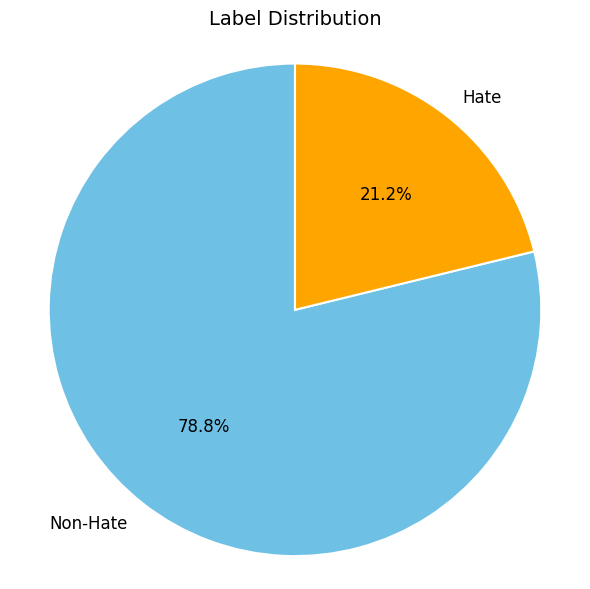

In [9]:
labels = label_counts['label'].map({0: 'Non-Hate', 1: 'Hate'})
sizes = label_counts['count']
colors = ['#6EC1E4', 'orange']  # 0: non-hate, 1: hate

plt.figure(figsize=(6, 6))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.5},
    textprops={'fontsize': 12}
)

plt.title('Label Distribution', fontsize=14, pad=12)
plt.axis('equal')
plt.tight_layout()
plt.show()

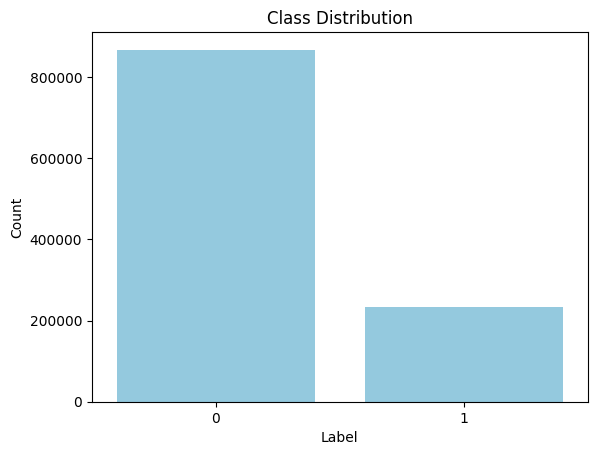

In [10]:
# Plot bar plot showing Class Imbalance
sns.barplot(data=label_counts, x='label', y='count', color='skyblue')
plt.title("Class Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

# Create Train-Dev-Test Splits

In [11]:
# Keep 3% of our data
df, _ = train_test_split(df, train_size = 0.03, random_state=random_state, shuffle = True, stratify = df['label'])
df.head()

,label,text
727805,0,"It is definitely bullshit, because as a man, y..."
337405,0,:::::::Still you supply no policy. Evidently ...
677565,0,but try to find stupid anti irish messages on ...
1065523,0,::Agreed. I'm trying to salvage the informati...
35654,0,"You may lose your sense of purpose, only to un..."


In [12]:
# First stratified split: train (80%) and temp (20%)
train_df, temp_df = train_test_split(df, test_size=0.2, random_state=random_state, shuffle = True, stratify = df['label'])

# Second stratified split: dev (10%) and test (10%)
dev_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=random_state, shuffle = True, stratify = temp_df['label'])

# Reset index for train
train_df = train_df.reset_index(drop = True)

# Reset index for dev
dev_df = dev_df.reset_index(drop = True)

# Reset index for test
test_df = test_df.reset_index(drop = True)

# Check sizes
print(len(train_df), len(dev_df), len(test_df))

26427 3303 3304


# Compute Split Statistics

In [13]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/raviraghavan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [14]:
def compute_split_stats(df):
    num_sentences = df['text'].apply(lambda x: len(sent_tokenize(x)))
    num_words = df['text'].apply(lambda x: len(word_tokenize(x)))

    return {
        "avg_sentences_per_post": num_sentences.mean(),
        "avg_words_per_post": num_words.mean(),
        "num_posts": len(df)
    }

summary_df = pd.DataFrame([
    {"split": "train", **compute_split_stats(train_df)},
    {"split": "dev",   **compute_split_stats(dev_df)},
    {"split": "test",  **compute_split_stats(test_df)},
])

summary_df

,split,avg_sentences_per_post,avg_words_per_post,num_posts
0,train,3.134408,55.336171,26427
1,dev,3.105056,54.861641,3303
2,test,3.168281,55.167978,3304


# Save Train-Dev-Test Splits

In [15]:
train_df.to_csv("../data/train_data.csv", index = False)
dev_df.to_csv("../data/dev_data.csv", index = False)
test_df.to_csv("../data/test_data.csv", index = False)